In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

In [0]:
#loading mnist data
(x_train, y_train), (x_test,y_test)= mnist.load_data()

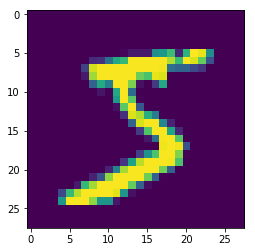

In [35]:
plt.imshow(x_train[0])

In [36]:
x_train[0].shape

(28, 28)

In [0]:
#reshaping to fit the model; 600000(or 10000) images, each of 28x28 pixels and 1= greyscale
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
#one-hot-encode target column
#this is done to assign a value to each output- i.e., a value to each number from 0 to 9
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
#checking the one-hot encoding
#first image in the dataset is 5. Therefore, 6th array element is set to 1
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#building the model: import Sequential, Dense, Conv2D and Flatten from keras

#create a model
model = Sequential()

#add layers
model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape= (28,28,1)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [0]:
#compileing the model;
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [42]:
model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 3)

W0725 05:51:36.510897 139980729149312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 05:51:36.563424 139980729149312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 16s 262us/step - loss: 1.3272 - acc: 0.8828 - val_loss: 0.0802 - val_acc: 0.9749
Epoch 2/3
60000/60000 [==============================] - 8s 139us/step - loss: 0.0674 - acc: 0.9800 - val_loss: 0.0766 - val_acc: 0.9768
Epoch 3/3
60000/60000 [==============================] - 8s 139us/step - loss: 0.0447 - acc: 0.9858 - val_loss: 0.0878 - val_acc: 0.9780


In [44]:
#predicting the data
model.predict(x_test[:3])

array([[6.7642071e-07, 3.7119474e-15, 4.3441345e-05, 9.0226124e-05,
        5.3504154e-12, 2.4280531e-11, 1.3312386e-13, 9.9986541e-01,
        6.7850848e-08, 1.9594219e-07],
       [1.7946310e-10, 1.2386621e-10, 1.0000000e+00, 1.1055331e-09,
        2.2440108e-13, 1.0722343e-14, 5.9355134e-09, 1.1679728e-15,
        8.0781393e-10, 3.0296697e-19],
       [2.9328034e-05, 9.9627918e-01, 2.1074277e-04, 5.3501185e-07,
        2.9852279e-05, 4.4511949e-06, 4.4899946e-07, 7.8299836e-06,
        3.4374839e-03, 5.8114018e-08]], dtype=float32)

In [47]:
#comparing the result with the actual data
y_test[:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)